<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/reusing_trained_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 26th January, 2021
# My folder: https://github.com/harnalashok/deeplearning
# Objective: 
#             i) Reuse layers from one neural network in another.
#             ii)Ist model was trained using a different set of 
#                class labels than present in the IInd case
#
# Ref:
#      Aurelien Book: Page 347 
#      Save and Laod models: https://www.tensorflow.org/guide/keras/save_and_serialize

**Problem**<br>
We will take fashion-mnist data. This data contains ten items. We will filter out data for two of the items--shirts and sandals. Prepare a predictive model with remaining eight items.<br>
After predictive model is made, we will use the trained layers of this model in another NN model to make predictions for the remaining two items. That is, we will reuse trained layers from the first model in the IInd model.

The following paragraph from Aurelien's book (page 349) is worth noting:<br>
> Transfer learning does not work very well with small dense networks: it works best with deep convolutional neural networks. Presumably becuase small netwirks learn few patterns and dense networks learn specific patterns. These specific patterns are unlikely to be useful im many other situations.Transfer learning works best with deep convolutional networks.




In [3]:
# 1.0 Call libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import plot_model
import numpy as np

In [4]:
# 1.1 Display multiple commands outputs from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
# 2.0 Get split data
(X_train, y_train), (X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
# 2.1 Shape of train data
X_train.shape    # (60000, 28, 28)
y_train.shape    # (60000,)

(60000, 28, 28)

(60000,)

In [7]:
# 2.2 Fashion items
items = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
# 2.3 Normalise train/test data
X_train = X_train/255.0
X_test = X_test/255.0

In [9]:
# 2.4 We filter our data further
#     Put Shirts and Sandals in one dataset
#     And remaining 8 items in another dataset.
#     Shirts and Sandals are labelled as '5' & '6'

## Get train/test data with shirts and sandals:
# 2.4.1
ss_train = X_train[np.logical_or (y_train == 5,y_train == 6), :, :]
ss_train.shape   # (12000, 28, 28)
# 2.4.2
ss_y_train = y_train[np.logical_or (y_train == 5,y_train == 6)]
ss_y_train.shape  # (12000,)

# 2.4.3
ss_test = X_test[np.logical_or (y_test == 5,y_test == 6), :, :]
ss_test.shape    # (2000, 28, 28)
# 2.4.4
ss_y_test = y_test[np.logical_or (y_test == 5,y_test == 6)]
ss_y_test.shape   # (2000,)

(12000, 28, 28)

(12000,)

(2000, 28, 28)

(2000,)

In [10]:
# 3.0 Change labels of shirts and sandals
#     in ss_y_train/ss_y_test to 1 and 0
#     from present 6 and 5

ss_y_train[ss_y_train == 6] = 1
ss_y_train[ss_y_train == 5] = 0

# 3.1 Recheck 
ss_y_train

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [11]:
# 4.0 Filter train/test data for remaining 8 items
# 4.1 train data
data_train = X_train[ np.logical_and (y_train != 5 , y_train !=6), :,:]
data_train.shape  # (48000, 28, 28)

# 4.2 'train' labels
data_y_train = y_train[ np.logical_and (y_train != 5 , y_train !=6)]
data_y_train.shape  # (48000,)

# 4.3 Filter 'test' data
data_test = X_test[ np.logical_and (y_test != 5 , y_test !=6), :,:]
data_test.shape   # (8000, 28, 28)
# 4.4 Filter data with 'test' labels
data_y_test = y_test[ np.logical_and (y_test != 5 , y_test !=6)]
data_y_test.shape  # (8000,)

(48000, 28, 28)

(48000,)

(8000, 28, 28)

(8000,)

In [12]:
# 4.5 Reshape train/test data

#     8-items data
data_train = data_train.reshape(-1,784)
data_test = data_test.reshape(-1,784)

# 4.6 2-items data
ss_train = ss_train.reshape(-1,784)
ss_test = ss_test.reshape(-1,784)

In [13]:
# 5.0 Our Ist model. No frills

units =100

# 5.1 Input layer
input_one = keras.layers.Input(shape = (784,))

# 5.2 Hidden layers
x = keras.layers.Dense(units = units, activation = "selu", name = "Layer_a")(input_one)
x = keras.layers.Dense(units = units, activation = "selu", name = "Layer_b")(x)
x = keras.layers.Dense(units = units, activation = "selu", name = "Layer_c")(x)

# 5.3 Output layer
out_one = keras.layers.Dense(units = 10, activation = 'softmax', name = "output_layer")(x)

# 5.4 Design model
model_one = Model(inputs = [input_one], outputs = [out_one])

# 5.5 Compile model
model_one.compile(loss = "sparse_categorical_crossentropy", metrics = "accuracy")

# 5.6 Fit the model
model_one.fit(data_train,data_y_train, epochs = 20)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4742 - accuracy: 0.8354
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2629 - accuracy: 0.9060
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2357 - accuracy: 0.9154
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2137 - accuracy: 0.9232
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2042 - accuracy: 0.9278
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1908 - accuracy: 0.9307
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1790 - accuracy: 0.9357
Epoch 8/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1772 - accuracy: 0.9382
Epoch 9/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1712 - accuracy: 0.9378
Epoch 10/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.162

In [14]:
# 5.7 Model summary
model_one.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
Layer_a (Dense)              (None, 100)               78500     
_________________________________________________________________
Layer_b (Dense)              (None, 100)               10100     
_________________________________________________________________
Layer_c (Dense)              (None, 100)               10100     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1010      
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


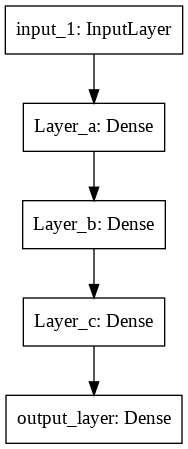

In [15]:
# 5.8 Plot the model
plot_model(model_one)

In [16]:
# 6.1 Check folders under /home
! ls /home


In [17]:
# 6.0 Save this model in a folder. 
#     Folder() will be created if 
#     they do not exist:
#  Ref: https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model

path = "/home/ashok/mymodel"

tf.keras.models.save_model(
                           model_one,
                           path,
                           include_optimizer=True,  # Default
                           overwrite = True         # Default
                           )


INFO:tensorflow:Assets written to: /home/ashok/mymodel/assets


In [18]:
# 6.1 Let us have a look at what was saved:

! ls /home/ashok/mymodel


assets	saved_model.pb	variables


In [19]:
# 6.2 Now that model is saved, 
#     we can delete it from RAM
del(model_one)

In [20]:
# 6.3 Check if 'model' is deleted
model_one.layers

NameError: ignored

In [21]:
# 6.4 Let us load back the saved model 
model = keras.models.load_model(path)

In [22]:
# 6.5 Check model summary
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
Layer_a (Dense)              (None, 100)               78500     
_________________________________________________________________
Layer_b (Dense)              (None, 100)               10100     
_________________________________________________________________
Layer_c (Dense)              (None, 100)               10100     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1010      
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


There are two ways of creating our new model that will reuse the trained layers of our old model.

In [23]:
## 7.0
# Method 1: Build a fresh model having
#           first three layers with 
#           the same configuration 
#           as in the earlier model
#           Our intention is to REUSE 
#           learnt weights in the Ist three 
#           layers in the new model


units =100
input_l = keras.layers.Input(shape = (784,))
y = keras.layers.Dense(units = units, activation = "selu", name = "a")(input_l)
y = keras.layers.Dense(units = units, activation = "selu", name = "b")(y)
y = keras.layers.Dense(units = units, activation = "selu", name = "c")(y)


In [24]:
# 7.1 Now add to it our own layers

y = keras.layers.Dense(units = 20, activation = 'selu', name = "x1")(y)
y = keras.layers.Dense(units = 8, activation = 'relu', name = "x2")(y)
out_l = keras.layers.Dense(units = 1, activation = 'sigmoid', name = "out_layer")(y)

In [25]:
# 7.2 Create model
model_l = Model(inputs = [input_l], outputs = [out_l])
model_l.compile(loss = "binary_crossentropy", metrics = ["accuracy"])
model_l.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
a (Dense)                    (None, 100)               78500     
_________________________________________________________________
b (Dense)                    (None, 100)               10100     
_________________________________________________________________
c (Dense)                    (None, 100)               10100     
_________________________________________________________________
x1 (Dense)                   (None, 20)                2020      
_________________________________________________________________
x2 (Dense)                   (None, 8)                 168       
_________________________________________________________________
out_layer (Dense)            (None, 1)                 9   

In [26]:
# 8.0 Let us transfer weights in this model
#     from weights from our earlier learned-model
#     After transferring weights, let us also freeze
#     the layer-weights

for i in range(4):
  model_l.layers[i].set_weights(model.layers[i].get_weights())
  model_l.layers[i].trainable = False

In [27]:
# 8.1 Model MUST be recompiled after freezing layers
model_l.compile(loss = "binary_crossentropy", metrics = ["accuracy"])

In [28]:
# 8.2 As our last layer is Dense(1) with sigmoid activation
#     therefore, target data has to have shape of (None,1), rather
#     than (None,) as at present

ss_y_train = ss_y_train.reshape(-1,1)
ss_y_train.shape

(12000, 1)

In [29]:
# 8.3 Before we proceed for training
#     let us see which layers are trainable,
#     and which not

for layer in model_l.layers:
  print(layer.name,":",layer.trainable)

input_2 : False
a : False
b : False
c : False
x1 : True
x2 : True
out_layer : True


In [30]:
# 8.4 Begin training
model_l.fit(ss_train ,ss_y_train, epochs = 20)

Epoch 1/20
375/375 [==============================] - 1s 1ms/step - loss: 0.2035 - accuracy: 0.9331
Epoch 2/20
375/375 [==============================] - 1s 1ms/step - loss: 0.0053 - accuracy: 0.9986
Epoch 3/20
375/375 [==============================] - 1s 1ms/step - loss: 0.0039 - accuracy: 0.9984
Epoch 4/20
375/375 [==============================] - 1s 1ms/step - loss: 0.0060 - accuracy: 0.9984
Epoch 5/20
375/375 [==============================] - 1s 1ms/step - loss: 0.0016 - accuracy: 0.9995
Epoch 6/20
375/375 [==============================] - 1s 1ms/step - loss: 0.0036 - accuracy: 0.9987
Epoch 7/20
375/375 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 0.9996
Epoch 8/20
375/375 [==============================] - 1s 1ms/step - loss: 0.0024 - accuracy: 0.9990
Epoch 9/20
375/375 [==============================] - 1s 1ms/step - loss: 0.0021 - accuracy: 0.9991
Epoch 10/20
375/375 [==============================] - 1s 1ms/step - loss: 2.4734e-04 - accuracy: 0.

In [31]:
## 9.0
# Method 2:
#          Using the last but one layer
#          create a Sequential model

model_IInd = keras.models.Sequential(model.layers[:-1])

# 9.1 And add to it our own layers
model_IInd.add(keras.layers.Dense(units = 20, activation = 'selu', name = "x1"))
model_IInd.add(keras.layers.Dense(units = 8, activation = 'relu', name = "x2"))
model_IInd.add(keras.layers.Dense(units = 1, activation = 'sigmoid', name = "out_layer"))


In [32]:
# 9.2 Compile the model
model_IInd.compile(loss = "binary_crossentropy", metrics = ['accuracy'])


In [33]:
# 9.3 Let us freeze weights in some layers 

for i in range(4):
  model_IInd.layers[i].trainable = False

In [35]:
# 9.4 Model must be recompiled after freezing of layers:

model_IInd.compile(loss = "binary_crossentropy", metrics = ['accuracy'])

In [36]:
# 9.5 Before we proceed for training
#     let us see which layers are trainable,
#     and which not

for layer in model_IInd.layers:
  print(layer.name,":",layer.trainable)

Layer_a : False
Layer_b : False
Layer_c : False
x1 : False
x2 : True
out_layer : True


In [37]:
# 9.6 Begin training now:
model_IInd.fit(ss_train,ss_y_train, epochs = 20)

Epoch 1/20
375/375 [==============================] - 1s 1ms/step - loss: 0.8695 - accuracy: 0.6984
Epoch 2/20
375/375 [==============================] - 1s 1ms/step - loss: 0.0623 - accuracy: 0.9790
Epoch 3/20
375/375 [==============================] - 1s 1ms/step - loss: 0.0468 - accuracy: 0.9835
Epoch 4/20
375/375 [==============================] - 1s 1ms/step - loss: 0.0381 - accuracy: 0.9876
Epoch 5/20
375/375 [==============================] - 1s 1ms/step - loss: 0.0366 - accuracy: 0.9884
Epoch 6/20
375/375 [==============================] - 1s 1ms/step - loss: 0.0307 - accuracy: 0.9890
Epoch 7/20
375/375 [==============================] - 1s 1ms/step - loss: 0.0287 - accuracy: 0.9900
Epoch 8/20
375/375 [==============================] - 1s 1ms/step - loss: 0.0322 - accuracy: 0.9896
Epoch 9/20
375/375 [==============================] - 1s 1ms/step - loss: 0.0295 - accuracy: 0.9903
Epoch 10/20
375/375 [==============================] - 1s 1ms/step - loss: 0.0252 - accuracy: 0.9926

In [ ]:
######## I am done ##########